In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2021/train.csv
/kaggle/input/tabular-playground-series-mar-2021/test.csv


In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [3]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')

In [4]:
df.shape

(300000, 32)

In [5]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


# Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape

((240000, 31), (60000, 31))

In [8]:
X_train.isna().mean()

id        0.0
cat0      0.0
cat1      0.0
cat2      0.0
cat3      0.0
cat4      0.0
cat5      0.0
cat6      0.0
cat7      0.0
cat8      0.0
cat9      0.0
cat10     0.0
cat11     0.0
cat12     0.0
cat13     0.0
cat14     0.0
cat15     0.0
cat16     0.0
cat17     0.0
cat18     0.0
cont0     0.0
cont1     0.0
cont2     0.0
cont3     0.0
cont4     0.0
cont5     0.0
cont6     0.0
cont7     0.0
cont8     0.0
cont9     0.0
cont10    0.0
dtype: float64

In [9]:
X_test.isna().mean()

id        0.0
cat0      0.0
cat1      0.0
cat2      0.0
cat3      0.0
cat4      0.0
cat5      0.0
cat6      0.0
cat7      0.0
cat8      0.0
cat9      0.0
cat10     0.0
cat11     0.0
cat12     0.0
cat13     0.0
cat14     0.0
cat15     0.0
cat16     0.0
cat17     0.0
cat18     0.0
cont0     0.0
cont1     0.0
cont2     0.0
cont3     0.0
cont4     0.0
cont5     0.0
cont6     0.0
cont7     0.0
cont8     0.0
cont9     0.0
cont10    0.0
dtype: float64

In [10]:
train_ids = X_train.pop('id')
test_ids = X_test.pop('id')

In [11]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (19): ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
Numerical columns (11): ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']


In [12]:
for col in cat_cols:
    print(X_train[col].value_counts())

cat0
A    178929
B     61071
Name: count, dtype: int64
cat1
I    72497
F    35230
K    33525
L    25553
H    13724
N    10595
G     9049
M     9012
A     8402
J     8088
O     7027
B     5438
C     1352
D      328
E      180
Name: count, dtype: int64
cat2
A    134831
C     31110
D     18229
G     14549
Q      8689
F      7888
J      7361
M      6430
I      4241
L      3228
O      2208
N       283
B       176
H       176
S       168
U       141
R       104
K        99
E        89
Name: count, dtype: int64
cat3
A    149763
B     64012
C     12739
D      6947
E      2655
F      2018
K       663
G       297
L       235
J       226
H       225
I       140
N        80
Name: count, dtype: int64
cat4
E    103490
F     61339
G     24678
D     22338
H     18643
J      3455
I      2611
K      1175
M       443
C       403
O       264
B       235
S       217
L       177
T       175
Q        96
P        78
A        72
N        65
R        46
Name: count, dtype: int64
cat5
BI    190816
AB     33276
B

In [13]:
s = X_train[cat_cols].nunique()

In [14]:
s

cat0       2
cat1      15
cat2      19
cat3      13
cat4      20
cat5      84
cat6      16
cat7      51
cat8      61
cat9      19
cat10    298
cat11      2
cat12      2
cat13      2
cat14      2
cat15      4
cat16      4
cat17      4
cat18      4
dtype: int64

In [15]:
threshold = 3

woe_columns = list(s[s > 3].index)
one_hot_columns = list(s[s <= 3].index)

# Preprocess Class

In [16]:
X_train[woe_columns].mode().T[0].to_dict()

{'cat1': 'I',
 'cat2': 'A',
 'cat3': 'A',
 'cat4': 'E',
 'cat5': 'BI',
 'cat6': 'A',
 'cat7': 'AH',
 'cat8': 'BM',
 'cat9': 'A',
 'cat10': 'DJ',
 'cat15': 'B',
 'cat16': 'D',
 'cat17': 'D',
 'cat18': 'B'}

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        # Preprocess WOE Columns
        print("***")
        print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed

In [19]:
preprocessor = CustomPreprocessor(woe_columns=woe_columns, one_hot_columns=one_hot_columns)

In [20]:
X_train_t = preprocessor.fit_transform(X_train, y_train)

Processing cat1...
Processing cat2...
Processing cat3...
Processing cat4...
Processing cat5...
Processing cat6...
Processing cat7...
Processing cat8...
Processing cat9...
Processing cat10...
Processing cat15...
Processing cat16...
Processing cat17...
Processing cat18...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]


In [21]:
X_train_t.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat0_B,cat0_nan,cat11_B,cat11_nan,cat12_B,cat12_nan,cat13_B,cat13_nan,cat14_B,cat14_nan
254099,0.136528,0.158880,0.241366,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,...,1,0,0,0,0,0,0,0,0,0
53461,0.668561,0.491503,0.441523,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,...,0,0,1,0,0,0,0,0,1,0
247984,0.464504,0.432082,0.430172,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,...,0,0,0,0,1,0,0,0,1,0
209067,0.709037,0.752207,0.761392,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,...,0,0,0,0,0,0,0,0,1,0
185997,0.474071,0.213323,0.354421,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,...,0,0,0,0,0,0,0,0,1,0


In [22]:
X_test_t = preprocessor.transform(X_test)

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922


In [23]:
X_test_t = preprocessor.transform(X_test)

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922


# Correlation Filter

In [24]:
X_corr = X_train_t.copy()
X_corr['target'] = y_train

In [25]:
%%time

corr_matrix = X_corr.corr().abs()

CPU times: user 880 ms, sys: 26.9 ms, total: 907 ms
Wall time: 907 ms


In [ ]:
corr_matrix

In [26]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find feature pairs with correlation greater than a threshold
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# To remove one feature from each highly correlated pair
# (typically the one with lower correlation with target)
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    # Compare correlation with target
    if abs(X[feat1].corr(y)) < abs(X[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

Highly correlated feature pairs:
cont0 and cont10: 0.8078
cont1 and cont2: 0.8613
Features to drop due to high correlation: ['cont0', 'cont2']


# RFE

In [27]:
features_to_drop = ['cont0', 'cont2']

# Create filtered dataset
X_filtered = X_train_t.drop(columns=features_to_drop)
print(f"Original shape: {X_train_t.shape}, New shape: {X_filtered.shape}")

Original shape: (240000, 35), New shape: (240000, 33)


In [28]:
X_filtered.head()

,cont1,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cat1_woe,...,cat0_B,cat0_nan,cat11_B,cat11_nan,cat12_B,cat12_nan,cat13_B,cat13_nan,cat14_B,cat14_nan
254099,0.158880,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808,0.327758,...,1,0,0,0,0,0,0,0,0,0
53461,0.491503,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800,1.313239,...,0,0,1,0,0,0,0,0,1,0
247984,0.432082,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575,-0.136748,...,0,0,0,0,1,0,0,0,1,0
209067,0.752207,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071,-0.136748,...,0,0,0,0,0,0,0,0,1,0
185997,0.213323,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398,-0.864264,...,0,0,0,0,0,0,0,0,1,0


In [29]:
X_filtered.shape

(240000, 33)

In [30]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 63.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 102.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      S

In [31]:
import dagshub
dagshub.init(repo_owner='LukaJinc', repo_name='ML_Seminars', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=7f0d39f1-6a2c-411f-8823-daa38a523d64&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=393751e06b5f200bccf119fb3609aabadc577d8e2b440d1e601de014b4143fb7




Output()

Accessing as LukaJinc

Initialized MLflow to track repo "LukaJinc/ML_Seminars"

Repository LukaJinc/ML_Seminars initialized!

In [32]:
experiment_name = "LogisticRegression_Feature_Selection"
run_name = "logistic_regression_rfe_with_scaling"

Features selected by RFE:
1. cont1
2. cont2
3. cont5
4. cat1_woe
5. cat7_woe
6. cat8_woe
7. cat10_woe
8. cat15_woe
9. cat16_woe
10. cat17_woe
11. cat18_woe
12. cat0_B
13. cat11_B
14. cat13_B
15. cat14_B


2025/03/29 10:24:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/29 10:24:34 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/03/29 10:24:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run logistic_regression_rfe_with_scaling at: https://dagshub.com/LukaJinc/ML_Seminars.mlflow/#/experiments/1/runs/631598eff3324183bec09d2dc26ee04f
🧪 View experiment at: https://dagshub.com/LukaJinc/ML_Seminars.mlflow/#/experiments/1


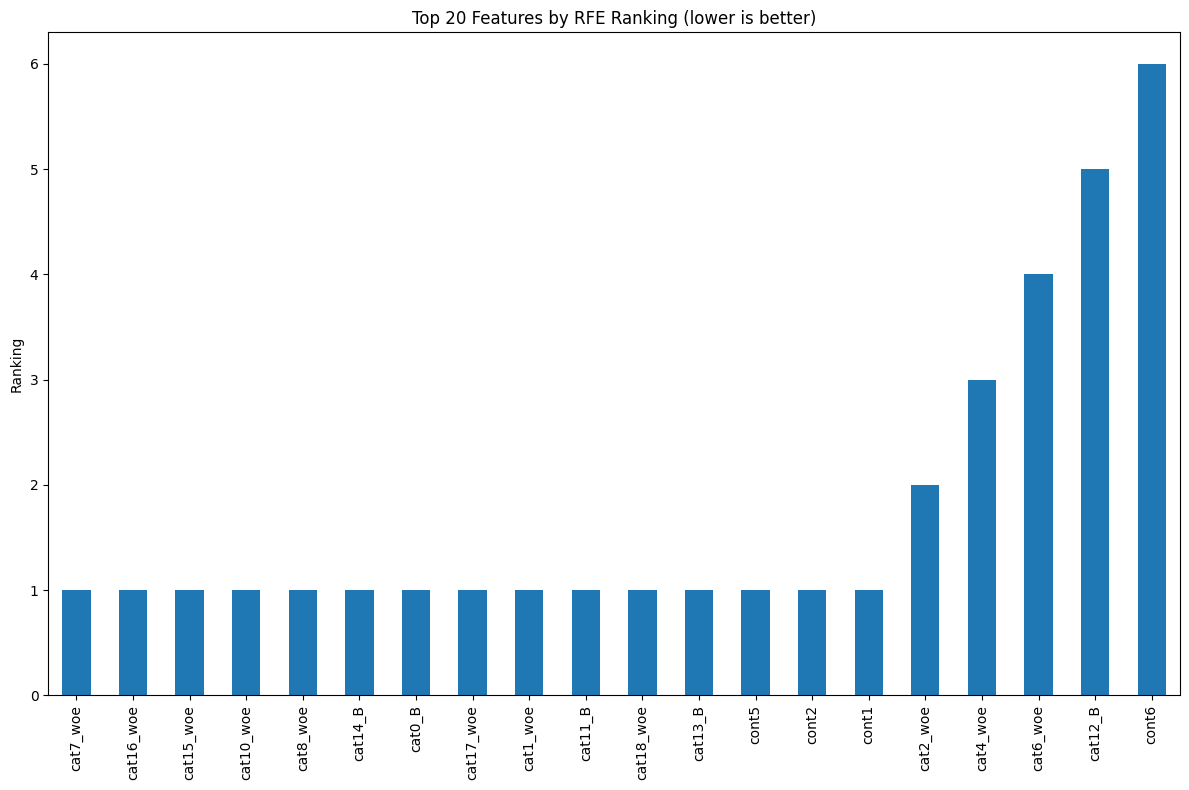

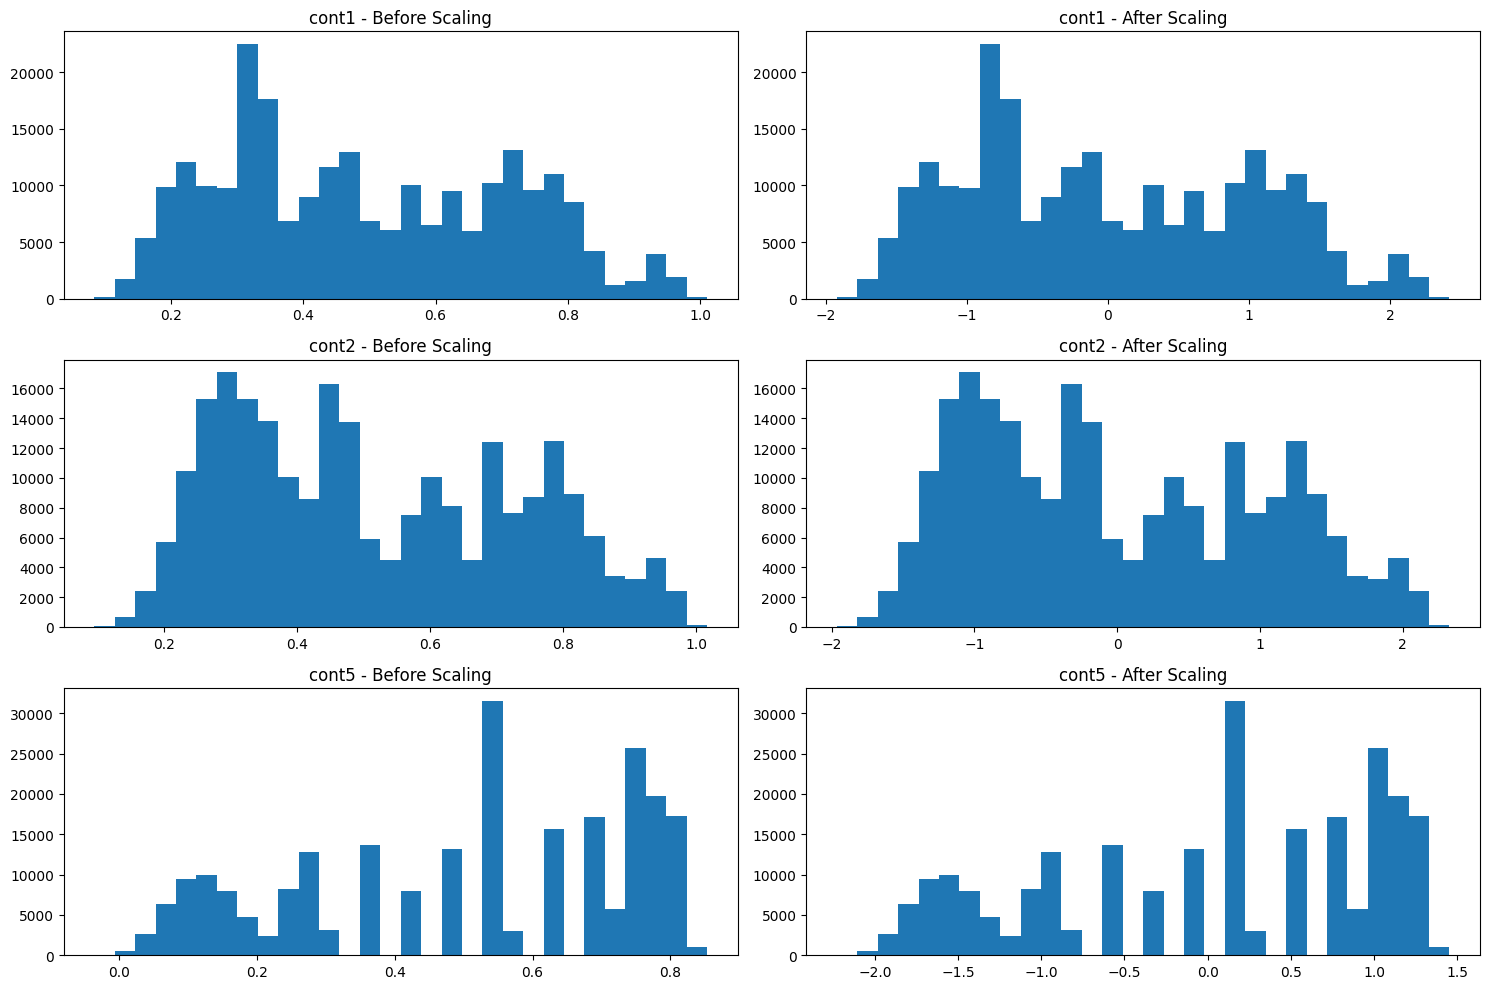

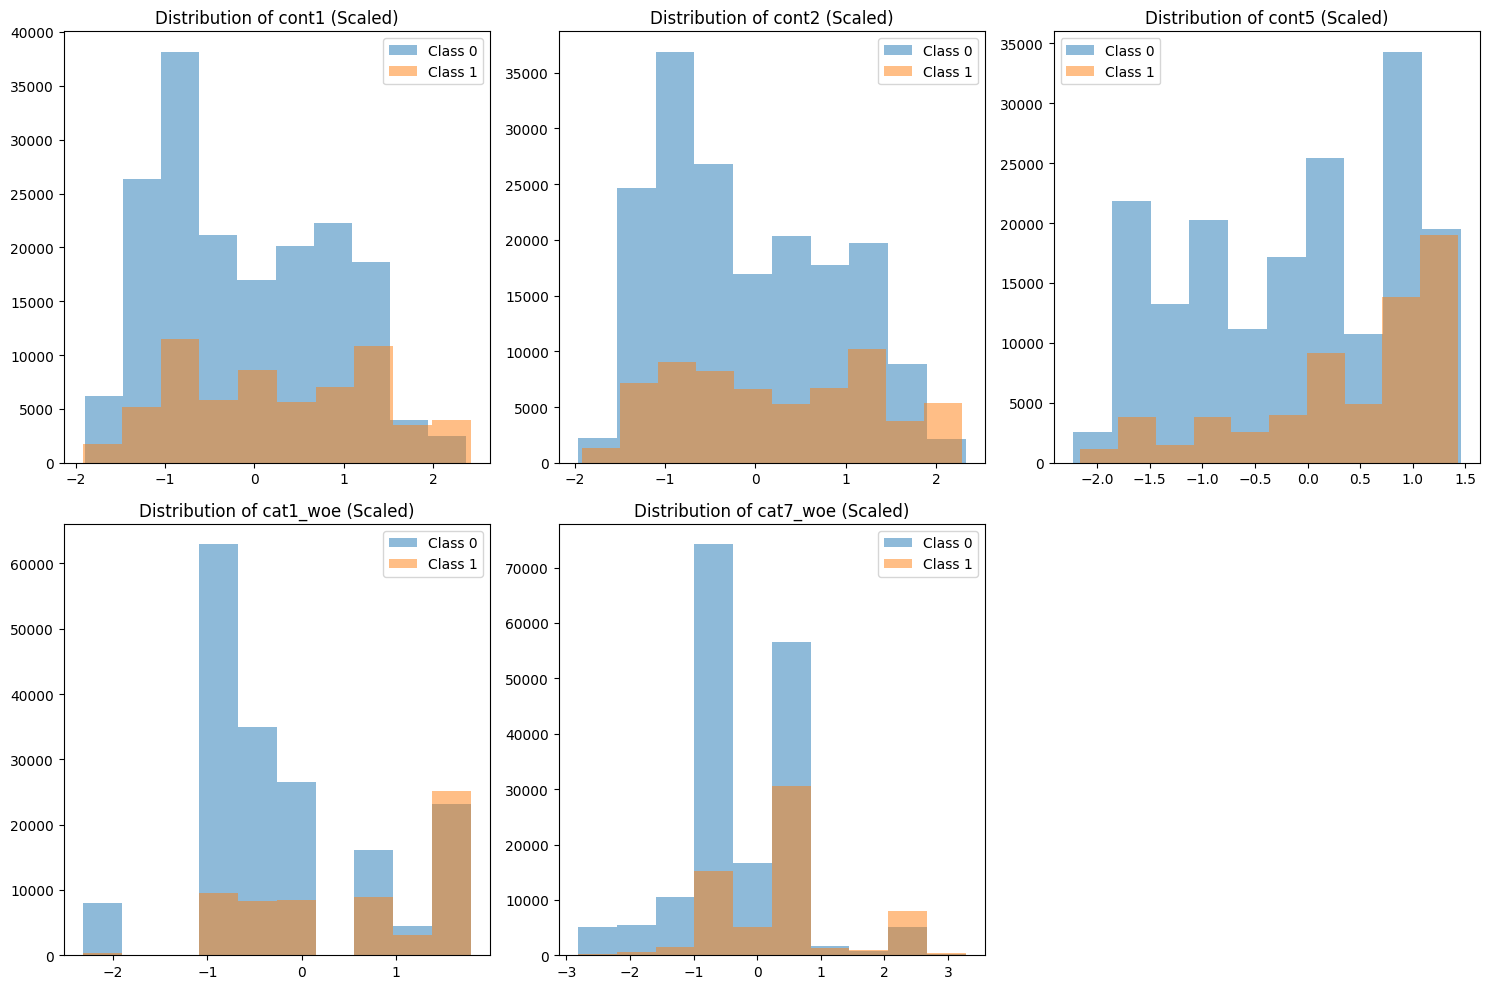

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Start MLflow run
mlflow.start_run(run_name=run_name)

# Log parameters
mlflow.log_param("model_type", "LogisticRegression")
mlflow.log_param("max_iter", 1000)
mlflow.log_param("random_state", 42)
mlflow.log_param("n_features_to_select", 15)
mlflow.log_param("rfe_step", 1)
mlflow.log_param("scaling_method", "StandardScaler")
mlflow.log_param("data_preprocessing", "scaled")

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_t),
    columns=X_train_t.columns,
    index=X_train_t.index
)

# Log scaling parameters
scale_mean = scaler.mean_.tolist()
scale_var = scaler.var_.tolist()
mlflow.log_param("scaler_mean_avg", np.mean(scale_mean))
mlflow.log_param("scaler_var_avg", np.mean(scale_var))

# Create and fit the model for feature selection only
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

# Get selected features
rfe_selected_features = X_train_t.columns[rfe.support_].tolist()
print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

# Log selected features as parameters
for i, feature in enumerate(rfe_selected_features, 1):
    mlflow.log_param(f"selected_feature_{i}", feature)

# Log feature rankings
feature_ranking = pd.Series(rfe.ranking_, index=X_train_t.columns)
feature_ranking_dict = feature_ranking.to_dict()
mlflow.log_params({f"rank_{feat}": rank for feat, rank in feature_ranking_dict.items()})

# Create plot for feature ranking
plt.figure(figsize=(12, 8))
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()

# Save the plot to a file and log it
plt.savefig("rfe_feature_ranking.png")
mlflow.log_artifact("rfe_feature_ranking.png")

# Create before/after scaling visualization for a few selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:3], 1):
    plt.subplot(3, 2, 2*i-1)
    plt.hist(X_train_t[feature], bins=30)
    plt.title(f'{feature} - Before Scaling')
    
    plt.subplot(3, 2, 2*i)
    plt.hist(X_train_scaled[feature], bins=30)
    plt.title(f'{feature} - After Scaling')

plt.tight_layout()
plt.savefig("scaling_visualization.png")
mlflow.log_artifact("scaling_visualization.png")

# Create feature distribution plots by class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:5], 1):  # Plot top 5 features
    plt.subplot(2, 3, i)
    plt.hist(X_train_scaled[feature][y_train==0], alpha=0.5, label='Class 0')
    plt.hist(X_train_scaled[feature][y_train==1], alpha=0.5, label='Class 1')
    plt.title(f'Distribution of {feature} (Scaled)')
    plt.legend()
plt.tight_layout()

# Save and log the distribution plot
plt.savefig("feature_distributions.png")
mlflow.log_artifact("feature_distributions.png")

# Log the RFE selector for future reference
mlflow.sklearn.log_model(rfe, "rfe_selector")
mlflow.sklearn.log_model(scaler, "standard_scaler")

# End the MLflow run
mlflow.end_run()

# Show plots if in interactive mode
plt.show()

# Final Pipeline

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class FinalCustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns, final_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

        self.final_columns = final_columns # Columns Selected By RFE

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        # Preprocess WOE Columns
        print("***")
        print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed[self.final_columns]

In [36]:
woe_columns, one_hot_columns, rfe_selected_features

(['cat1',
  'cat2',
  'cat3',
  'cat4',
  'cat5',
  'cat6',
  'cat7',
  'cat8',
  'cat9',
  'cat10',
  'cat15',
  'cat16',
  'cat17',
  'cat18'],
 ['cat0', 'cat11', 'cat12', 'cat13', 'cat14'],
 ['cont1',
  'cont2',
  'cont5',
  'cat1_woe',
  'cat7_woe',
  'cat8_woe',
  'cat10_woe',
  'cat15_woe',
  'cat16_woe',
  'cat17_woe',
  'cat18_woe',
  'cat0_B',
  'cat11_B',
  'cat13_B',
  'cat14_B'])

In [37]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
254099,B,M,F,A,E,G,E,AW,Y,W,...,0.158880,0.241366,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808
53461,A,G,Q,A,F,AB,C,AH,K,A,...,0.491503,0.441523,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800
247984,A,K,A,A,C,BI,C,E,AU,F,...,0.432082,0.430172,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575
209067,A,K,A,A,F,BI,A,AL,L,A,...,0.752207,0.761392,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071
185997,A,I,D,A,E,BI,C,AV,AE,A,...,0.213323,0.354421,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398


In [38]:
final_preprocessor = FinalCustomPreprocessor(woe_columns=woe_columns, 
                                             one_hot_columns=one_hot_columns, 
                                             final_columns=rfe_selected_features)

X_train_final = final_preprocessor.fit_transform(X_train, y_train)

Processing cat1...
Processing cat2...
Processing cat3...
Processing cat4...
Processing cat5...
Processing cat6...
Processing cat7...
Processing cat8...
Processing cat9...
Processing cat10...
Processing cat15...
Processing cat16...
Processing cat17...
Processing cat18...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]


In [40]:
X_test_final = final_preprocessor.transform(X_test)

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922


In [41]:
X_test_final.head()

,cont1,cont2,cont5,cat1_woe,cat7_woe,cat8_woe,cat10_woe,cat15_woe,cat16_woe,cat17_woe,cat18_woe,cat0_B,cat11_B,cat13_B,cat14_B
4941,0.342611,0.342671,0.735347,-0.644151,-0.184091,0.294848,-0.080711,0.028696,-1.015269,-0.302094,-0.430517,1,0,0,0
51775,0.176353,0.214172,0.061876,0.402745,0.473441,-0.254186,0.066560,-0.856165,-1.015269,0.832992,-0.430517,0,0,0,1
115253,0.775301,0.852616,0.554478,-0.136748,-0.491696,-0.072218,-1.411786,-0.856165,-1.015269,-0.302094,-0.430517,0,0,0,1
299321,0.700799,0.855175,0.679097,1.313239,-1.842258,-0.733826,-1.411786,-0.856165,-1.015269,-0.302094,-0.430517,0,0,0,1
173570,0.128650,0.284130,0.262829,1.061768,-0.491696,-0.140965,-0.080711,-0.856165,-1.015269,-0.302094,-0.430517,0,1,0,1


In [ ]:
X_train_t[rfe_selected_features].head()

In [39]:
X_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
4941,B,J,A,A,E,BI,C,AN,M,E,...,0.342611,0.342671,0.560342,0.612346,0.735347,0.571919,0.349539,0.365583,0.346876,0.314112
51775,A,N,A,C,E,R,G,AH,BM,A,...,0.176353,0.214172,0.780538,0.233038,0.061876,0.108614,0.167053,0.276963,0.255904,0.246510
115253,A,K,A,A,E,BI,A,E,AD,F,...,0.775301,0.852616,0.842231,0.810073,0.554478,0.225124,0.932560,0.587645,0.772923,0.927355
299321,A,G,A,D,E,BI,A,Y,L,A,...,0.700799,0.855175,0.870768,0.671623,0.679097,0.228974,0.891719,0.617799,0.788595,0.960626
173570,A,L,C,A,E,AB,C,E,AX,A,...,0.128650,0.284130,0.265940,0.795067,0.262829,0.405174,0.358326,0.253632,0.258900,0.326864


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocess', FinalCustomPreprocessor(woe_columns=woe_columns, 
                                             one_hot_columns=one_hot_columns, 
                                             final_columns=rfe_selected_features)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict_proba(X_test)

Processing cat1...
Processing cat2...
Processing cat3...
Processing cat4...
Processing cat5...
Processing cat6...
Processing cat7...
Processing cat8...
Processing cat9...
Processing cat10...
Processing cat15...
Processing cat16...
Processing cat17...
Processing cat18...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922


In [43]:
preds

array([[0.93921434, 0.06078566],
       [0.89077942, 0.10922058],
       [0.84867771, 0.15132229],
       ...,
       [0.97183731, 0.02816269],
       [0.24945101, 0.75054899],
       [0.47843579, 0.52156421]])

In [44]:
experiment_name = "Final_Classification_Pipeline"
run_name="logistic_regression_with_custom_preprocessing"

Processing cat1...
Processing cat2...
Processing cat3...
Processing cat4...
Processing cat5...
Processing cat6...
Processing cat7...
Processing cat8...
Processing cat9...
Processing cat10...
Processing cat15...
Processing cat16...
Processing cat17...
Processing cat18...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['cat10_woe']
cat10_woe cat10 woe DJ -0.14406253441406922


2025/03/29 10:31:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



=== Model Performance Summary ===
Accuracy: 0.8409
Precision: 0.7422
Recall: 0.6011
F1 Score: 0.6642
ROC AUC: 0.8747
PR AUC: 0.7571

Experiment logged to MLflow. Run ID: 13116675c27e41c5807aee542f4fef4f
🏃 View run logistic_regression_with_custom_preprocessing at: https://dagshub.com/LukaJinc/ML_Seminars.mlflow/#/experiments/2/runs/13116675c27e41c5807aee542f4fef4f
🧪 View experiment at: https://dagshub.com/LukaJinc/ML_Seminars.mlflow/#/experiments/2


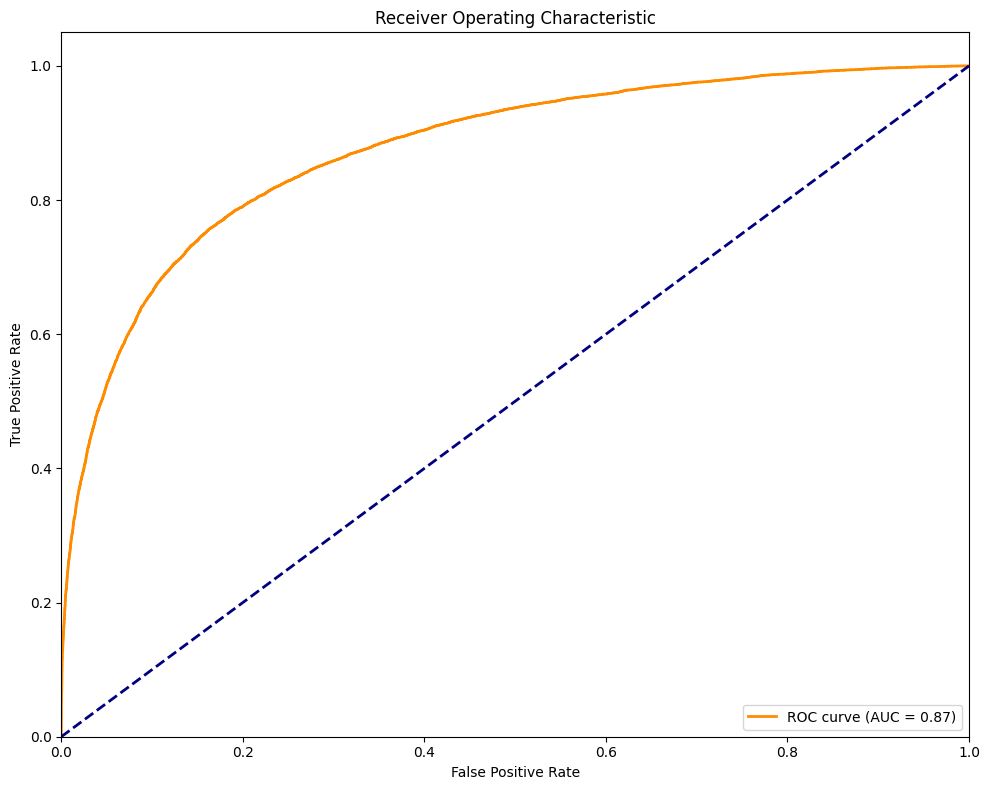

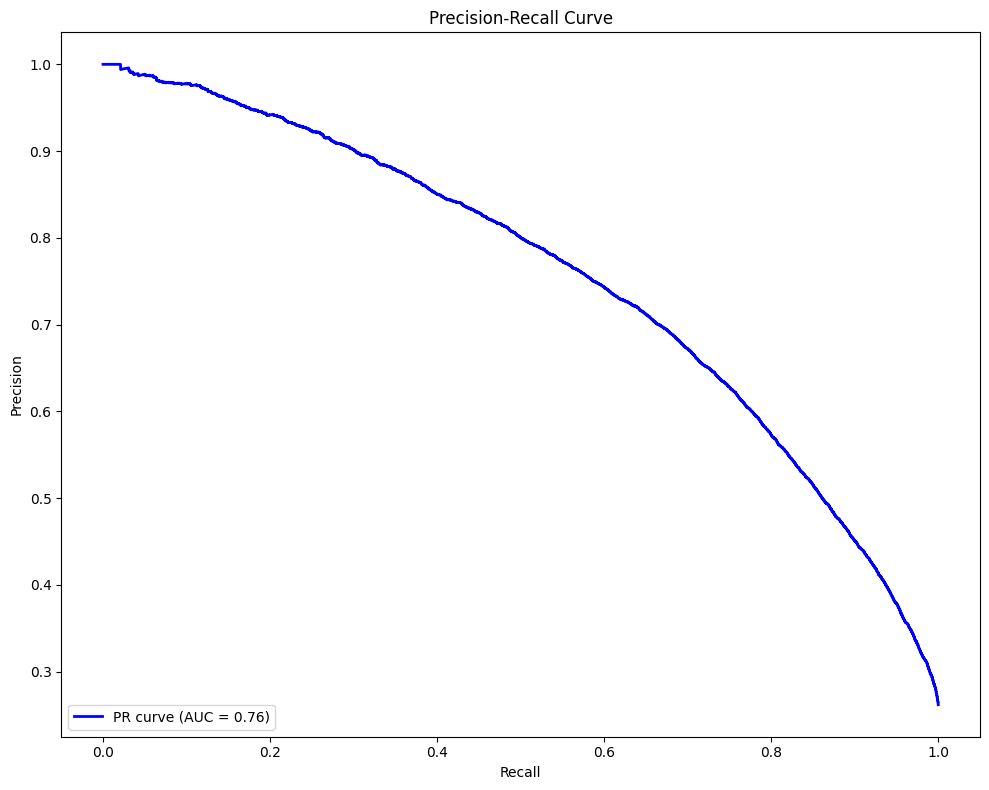

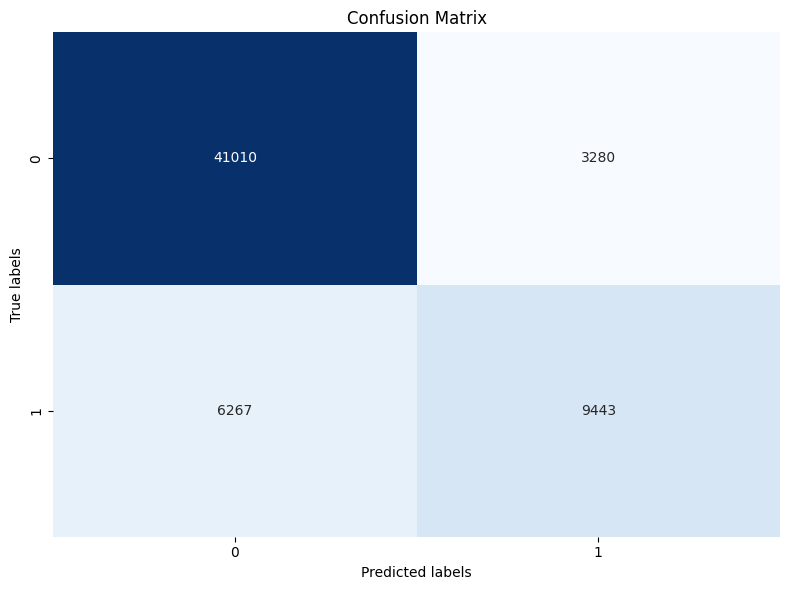

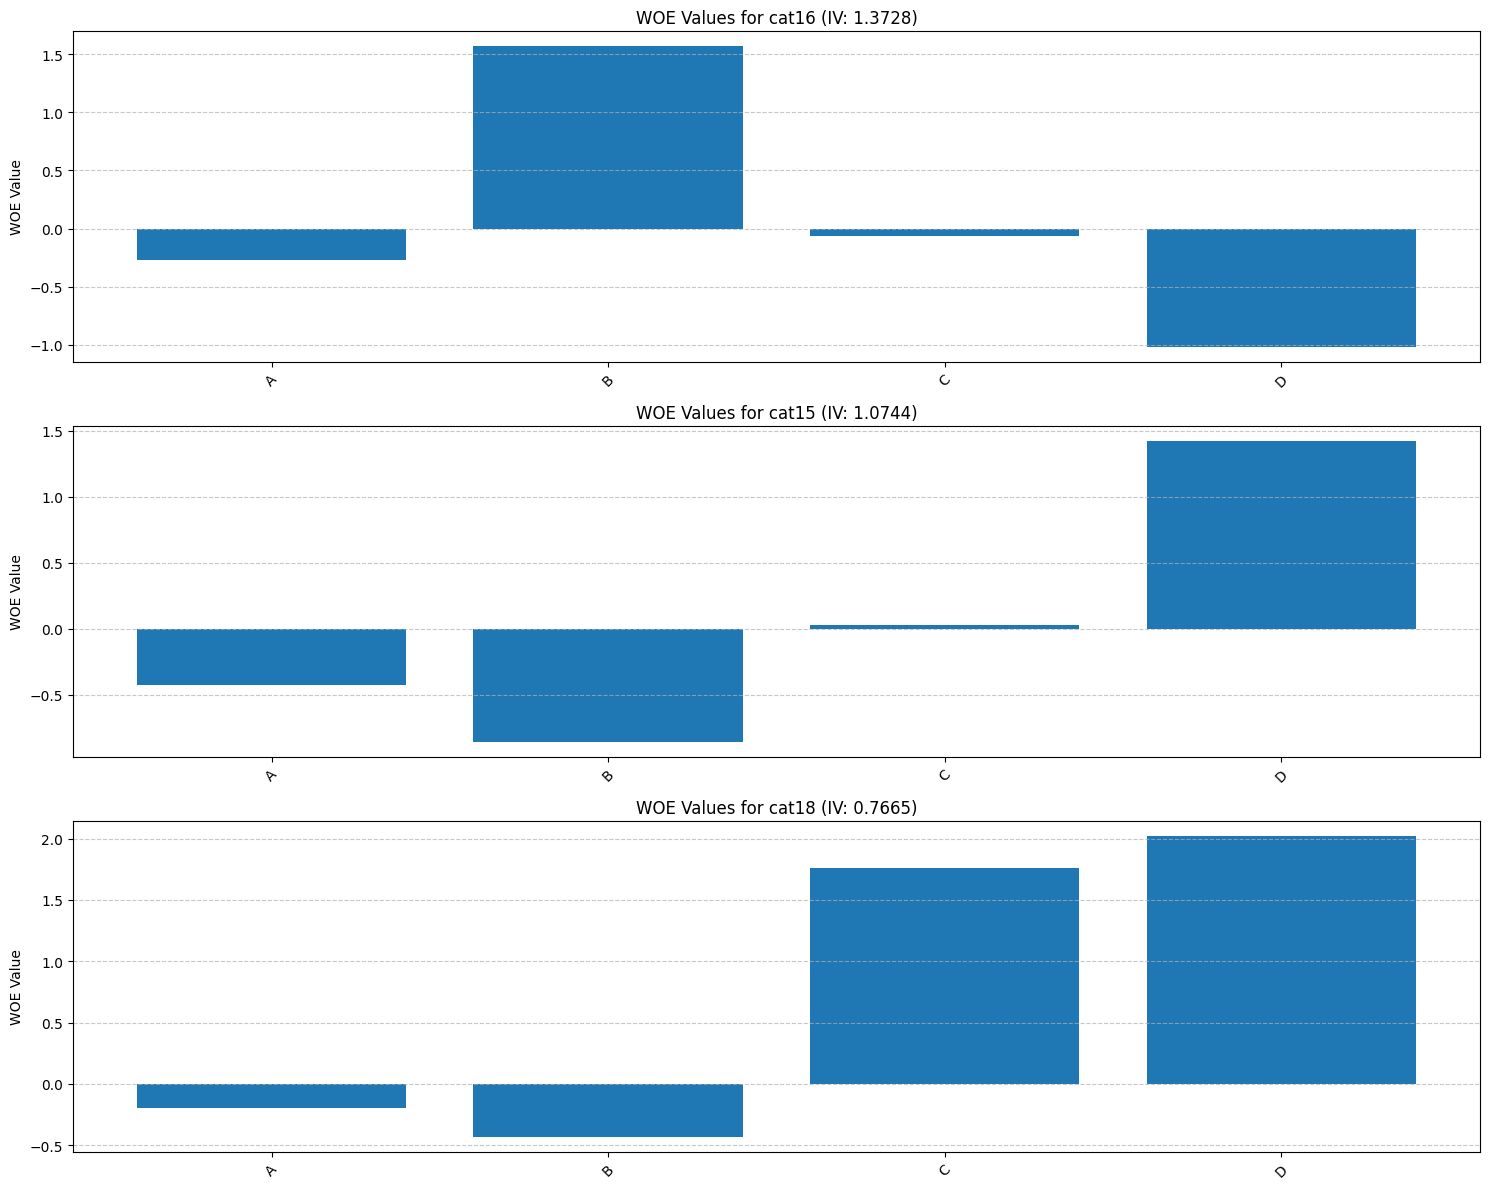

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance

# Set up the MLflow experiment
mlflow.set_experiment(experiment_name)

# Start MLflow run
with mlflow.start_run(run_name=run_name):
    # Create and fit the pipeline
    pipeline = Pipeline([
        ('preprocess', FinalCustomPreprocessor(woe_columns=woe_columns, 
                                               one_hot_columns=one_hot_columns, 
                                               final_columns=rfe_selected_features)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Log pipeline parameters
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("woe_columns_count", len(woe_columns))
    mlflow.log_param("one_hot_columns_count", len(one_hot_columns))
    mlflow.log_param("final_features_count", len(rfe_selected_features))
    
    # Log WOE columns
    for i, col in enumerate(woe_columns):
        mlflow.log_param(f"woe_column_{i+1}", col)
        # Log information value for each WOE column
        mlflow.log_metric(f"iv_value_{col}", pipeline.named_steps['preprocess'].iv_values[col])
    
    # Log one-hot columns
    for i, col in enumerate(one_hot_columns):
        mlflow.log_param(f"one_hot_column_{i+1}", col)
    
    # Log selected features
    for i, col in enumerate(rfe_selected_features):
        mlflow.log_param(f"selected_feature_{i+1}", col)
    
    # Calculate and log classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)
    
    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    
    # Plot Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    mlflow.log_metric("pr_auc", pr_auc)
    
    plt.figure(figsize=(10, 8))
    plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.savefig("precision_recall_curve.png")
    mlflow.log_artifact("precision_recall_curve.png")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    
    # Plot WOE distributions for top WOE columns
    top_woe_columns = sorted(woe_columns, 
                             key=lambda x: pipeline.named_steps['preprocess'].iv_values[x], 
                             reverse=True)[:3]
    
    plt.figure(figsize=(15, 12))
    for i, col in enumerate(top_woe_columns):
        woe_values = pipeline.named_steps['preprocess'].woe_mappings[col]
        
        plt.subplot(3, 1, i+1)
        
        # Convert to Series for easier plotting
        woe_series = pd.Series(woe_values).sort_index()
        
        plt.bar(woe_series.index.astype(str), woe_series.values)
        plt.title(f'WOE Values for {col} (IV: {pipeline.named_steps["preprocess"].iv_values[col]:.4f})')
        plt.ylabel('WOE Value')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig("woe_distributions.png")
    mlflow.log_artifact("woe_distributions.png")
    
    # Log the entire pipeline
    mlflow.sklearn.log_model(pipeline, "final_pipeline_model")
    
    
    # Print summary results
    print("\n=== Model Performance Summary ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print("\nExperiment logged to MLflow. Run ID:", mlflow.active_run().info.run_id)

# Load Final Pipeline

In [ ]:
import mlflow
logged_model = 'runs:/13116675c27e41c5807aee542f4fef4f/final_pipeline_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [ ]:
preds = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='binary')
recall = recall_score(y_test, preds, average='binary')
f1 = f1_score(y_test, preds, average='binary')

print("\n=== Model Performance Summary ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")